In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
)

In [6]:
df = pd.read_csv(
    "/home/ahmed/vscode/Diabetes Prediction/diabetes_binary_health_indicators_BRFSS2015.csv"
)

In [7]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [10]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
print(f"Duolicates are {df.duplicated().sum()}")

Duolicates are 24206


In [12]:
df.drop_duplicates(inplace=True)
# Check for duplicates
print(f"Duolicates are {df.duplicated().sum()}")

Duolicates are 0


In [13]:
df["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64

In [14]:
# see distinct values
for x in df.columns:
    print(f"{x} = {df[x].unique()}")
    print("-" * 100)

Diabetes_binary = [0. 1.]
----------------------------------------------------------------------------------------------------
HighBP = [1. 0.]
----------------------------------------------------------------------------------------------------
HighChol = [1. 0.]
----------------------------------------------------------------------------------------------------
CholCheck = [1. 0.]
----------------------------------------------------------------------------------------------------
BMI = [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
----------------------------------------------------------------------------------------------------
Smoker = [1. 0.]
------------------------------------------------

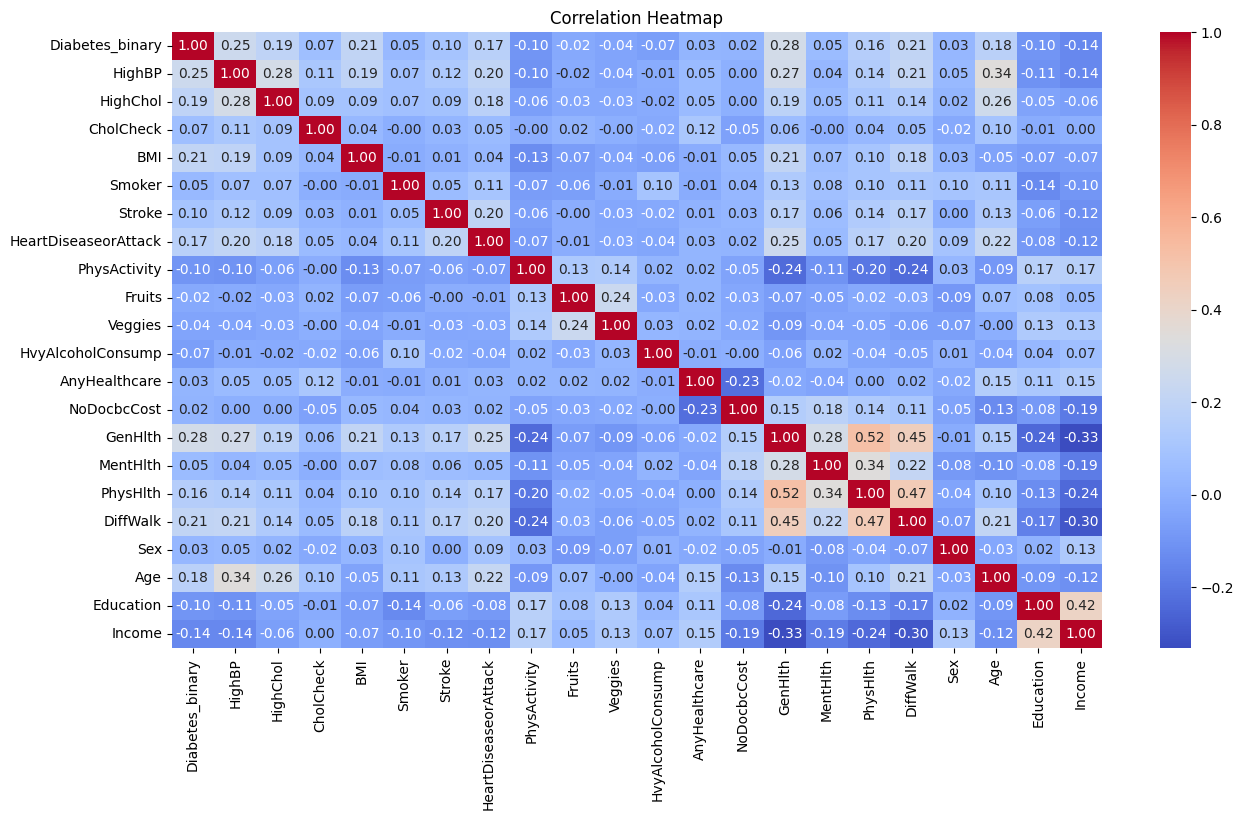

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# # set the matrix of the plots
# num_columns = len(df.columns)
# num_rows = (num_columns // 3) + (num_columns % 3 > 0)
# fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows * 6))
# axes = axes.flatten()
# # plot each column
# for i, col in enumerate(df.columns):
#     axes[i].hist(df[col], bins=20, color="blue", alpha=0.5, edgecolor="black")
#     axes[i].set_title(col)
#     axes[i].set_xlabel("Values")
#     axes[i].set_ylabel("Frequency")

# # remove empty plots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

### Observations:
- Based on the distribution in DiffWalk, GenHlth, MentHlth, apparently our cases are relatively healthy.
- Even though half of them are smokers and a third don't do any physical activity.
- Most of our cases are well Educated and have a fairly distributed income (almost).
## and there are more obs

In [17]:
# df["Diabetes_binary"] = df["Diabetes_binary"].astype(int)
# plt.figure(figsize=(7, 5))  # Slightly larger for 3 classes
# sns.boxplot(
#     x="Diabetes_binary",
#     y="Age",
#     data=df,
#     palette={
#         "0": "mediumaquamarine",
#         "1": "khaki",
#     },  # Color by class
# )
# plt.title("Age Distribution by Diabetes Class", fontsize=14)
# plt.xlabel("Diabetes Class (0 = None, 1 = Pre-Diabetes, 2 = Diabetes)")
# plt.ylabel("Age")
# plt.grid(
#     True, axis="y", linestyle="--", alpha=0.6
# )  # Optional: light horizontal grid lines
# plt.tight_layout()
# plt.show()

In [18]:
# plt.figure(figsize=(10, 5))
# sns.countplot(
#     x="Income",
#     hue="Diabetes_binary",
#     data=df,
#     palette={
#         0: "mediumaquamarine",
#         1: "khaki",
#     },
# )
# plt.title("Income vs Diabetes (3 classes)", fontsize=16)
# plt.xlabel("Income", fontsize=14)
# plt.ylabel("Count", fontsize=14)
# plt.xticks(rotation=45)
# plt.legend(title="Diabetes Class")
# plt.show()

### Insights and Observations:
- Income and Education have nothing to do with being diabetec, but we can certainlt notice that the  higher the income and the education level, the better health becomes.

In [19]:
# plt.figure(figsize=(10, 6))

# # Class 0
# sns.kdeplot(
#     data=df[df["Diabetes_binary"] == 0]["BMI"],
#     label="Diabetes_binary = 0",
#     color="mediumaquamarine",
# )

# # Class 1
# sns.kdeplot(
#     data=df[df["Diabetes_binary"] == 1]["BMI"],
#     label="Diabetes_binary = 1",
#     color="BlueViolet",
# )


# plt.title("BMI Density by Diabetes", fontsize=16)
# plt.xlabel("BMI", fontsize=14)
# plt.ylabel("Density", fontsize=14)
# plt.legend()
# plt.show()

### Insights and Observations:
- People with BMI between 22 and 40 are the most prone to diabetes.

In [20]:
# plt.figure(figsize=(10, 5))
# sns.countplot(
#     x="GenHlth",
#     hue="Diabetes_binary",
#     data=df,
#     palette={0: "mediumaquamarine", 1: "khaki"},
# )
# plt.title("GenHlth vs Diabetes_binary", fontsize=16)
# plt.xlabel("GenHlth", fontsize=14)
# plt.ylabel("Count", fontsize=14)
# plt.xticks(rotation=45)
# plt.legend(title="Diabetes Class")
# plt.show()

### Insights and Observations:
- People with medium General health are the most diabetec?

# Feature Engineering


In [21]:
# Set features (X) and new target (y)
x = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

# Apply Chi-Square feature selection
chi2_selector = SelectKBest(chi2, k="all")
X_kbest = chi2_selector.fit_transform(x, y)

# Get scores
chi2_scores = chi2_selector.scores_

# Make results table
chi2_results = pd.DataFrame({"Feature": x.columns, "Chi2 Score": chi2_scores})

# Sort features by importance
chi2_results = chi2_results.sort_values(by="Chi2 Score", ascending=False)

# Show result
print(chi2_results)

                 Feature    Chi2 Score
15              PhysHlth  97988.761672
3                    BMI  15507.736174
14              MentHlth  11419.584750
18                   Age   8539.906340
0                 HighBP   8098.548237
16              DiffWalk   7875.496177
13               GenHlth   7671.732832
6   HeartDiseaseorAttack   5822.145697
1               HighChol   4869.312739
20                Income   3377.099257
5                 Stroke   2156.678382
10     HvyAlcoholConsump    937.401148
7           PhysActivity    617.563886
19             Education    479.112939
4                 Smoker    253.826098
17                   Sex    137.837135
12           NoDocbcCost     83.662830
9                Veggies     82.098846
8                 Fruits     54.688897
2              CholCheck     48.904140
11         AnyHealthcare      7.949731


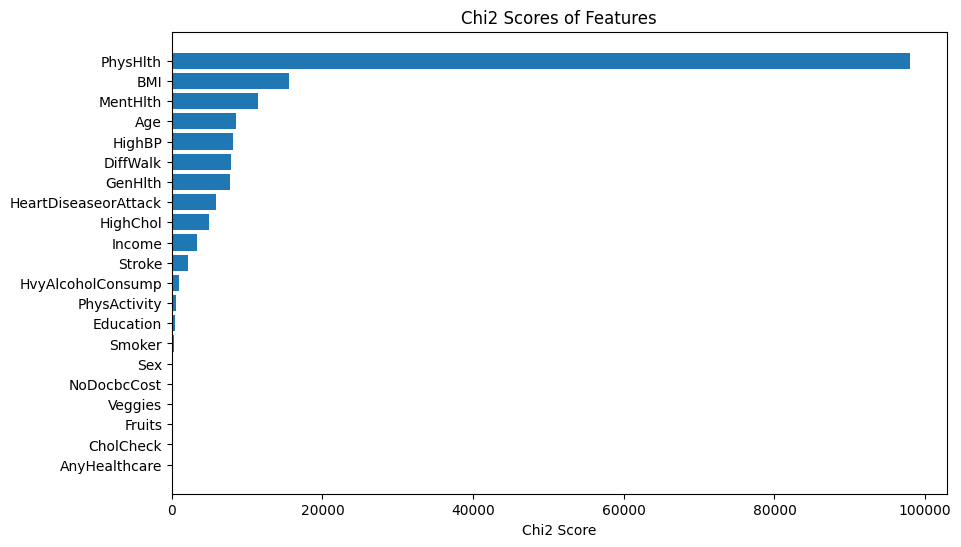

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(chi2_results["Feature"], chi2_results["Chi2 Score"])
plt.xlabel("Chi2 Score")
plt.title("Chi2 Scores of Features")
plt.gca().invert_yaxis()
plt.show()

In [23]:
selector = SelectKBest(score_func=chi2, k=12)
X_selected = selector.fit_transform(x, y)
# Get the selected feature names
selected_features = x.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Age', 'Income'],
      dtype='object')


In [24]:
cols_del = [
    "Sex",
    "Smoker",
    "Fruits",
    "Veggies",
    "NoDocbcCost",
    "AnyHealthcare",
    "CholCheck",
    "Education",
]
df = df.drop(cols_del, axis=1)

In [25]:
# plt.figure(figsize=(15, 8))
# # set the matrix of the plots
# r = (df.columns.size + 3) // 4
# for i, col in enumerate(df.columns):
#     plt.subplot(r, 4, i + 1)
#     sns.boxplot(x="Diabetes_binary", y=col, data=df)
#     plt.title(f"Boxplot of {col} by Diabetes_binary")
#     plt.xlabel("Diabetes_binary")
#     plt.ylabel(col)
# plt.tight_layout()

In [26]:
colWithOutliers = [
    "Age",
    "Income",
    "MentHlth",
    "BMI",
]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   BMI                   229474 non-null  float64
 4   Stroke                229474 non-null  float64
 5   HeartDiseaseorAttack  229474 non-null  float64
 6   PhysActivity          229474 non-null  float64
 7   HvyAlcoholConsump     229474 non-null  float64
 8   GenHlth               229474 non-null  float64
 9   MentHlth              229474 non-null  float64
 10  PhysHlth              229474 non-null  float64
 11  DiffWalk              229474 non-null  float64
 12  Age                   229474 non-null  float64
 13  Income                229474 non-null  float64
dtypes: float64(14)
memory usage: 26.3 MB


In [28]:
for col in colWithOutliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [29]:
df.head()

,Diabetes_binary,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Income
1,0.0,0.0,0.0,25.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,7.0,1.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,11.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,11.0,4.0
5,0.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,10.0,8.0
6,0.0,1.0,0.0,30.0,0.0,0.0,0.0,0.0,3.0,0.0,14.0,0.0,9.0,7.0


### Modeling

In [30]:
y = df["Diabetes_binary"]
X = df.drop("Diabetes_binary", axis=1)

In [31]:
def evaluate_model(model, model_name):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)  # Use same scaling

        # Train and evaluate
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracies.append(accuracy_score(y_test, y_pred))

    print(f"Average accuracy: {np.mean(accuracies):.2f}")
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [32]:
# def evaluate_model(model, x_test, y_test, model_name):
#     # K-fold cross validation
#     cv = KFold(n_splits=5, shuffle=True, random_state=42)
#     cv_scores = cross_val_score(model, x_train, y_train, cv=cv, scoring="accuracy")

#     print(f"\nK-fold Cross Validation Results for {model_name}:")
#     print(f"Mean Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

#     # Standard evaluation on test set
#     y_pred = model.predict(x_test)
#     y_proba = (
#         model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None
#     )
#     print(f"\nTest Set Evaluation for {model_name}:")
#     print(classification_report(y_test, y_pred))
#     if y_proba is not None:
#         print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

#     # Confusion Matrix
#     cm = confusion_matrix(y_test, y_pred)
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
#     plt.title(f"{model_name} Confusion Matrix")
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")
#     plt.show()

### Logistic Regression

Average accuracy: 0.86


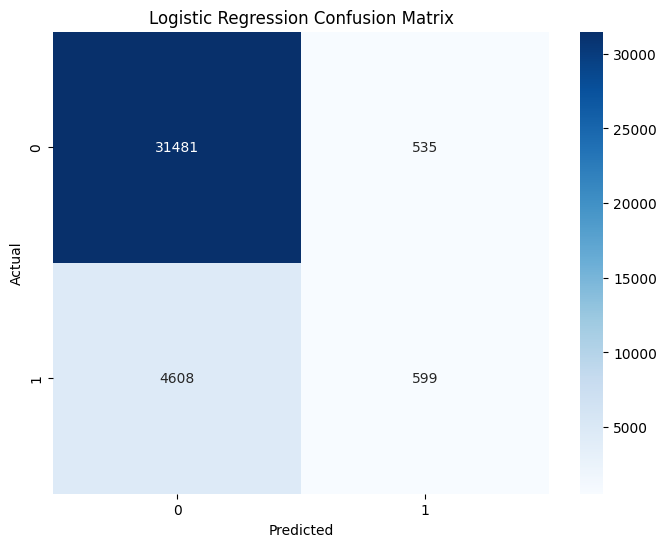

In [33]:
lr = LogisticRegression(max_iter=2000)
# lr.fit(x_train, y_train)
evaluate_model(lr, "Logistic Regression")

### KNN



In [34]:
# knn = KNeighborsClassifier(n_neighbors=5)
# # knn.fit(x_train, y_train)
# evaluate_model(knn, "KNN")

### Decision tree

Average accuracy: 0.81


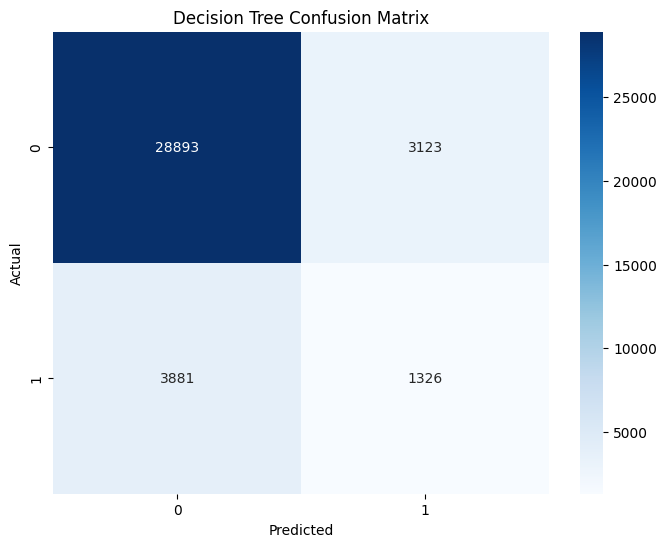

In [36]:
dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, "Decision Tree")

### Random Forests

Average accuracy: 0.84


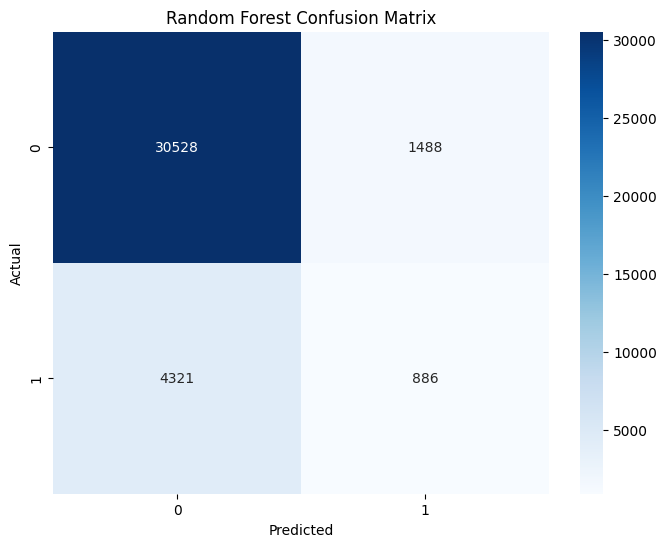

In [35]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
evaluate_model(rf, "Random Forest")